# Data Importing and Data Cleaning

This notebook will mainly cover the steps taken to import and clean the datasets from yelp.

In [1]:
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, tnrange

# Display Settings

pd.set_option('display.max_columns', 50)

From the Yelp Dataset, the 3 main json files that we will be importing and analyzing are the `business`, `review` and `user` files.

### Business File

In [2]:
# Importing Yelp Business JSON File

business = []

with open("/Users/a_appiagyei/Downloads/yelp_dataset/yelp_academic_dataset_business.json") as f:
    for line in f:
        business.append(json.loads(line))

# Length of rows of Data

len(business)  # 150,346 rows of business

150346

In [6]:
# Overview of columns of each entry of business file

business[10]

{'business_id': 'UJsufbvfyfONHeWdvAHKjA',
 'name': 'Marshalls',
 'address': '21705 Village Lakes Sc Dr',
 'city': "Land O' Lakes",
 'state': 'FL',
 'postal_code': '34639',
 'latitude': 28.1904587953,
 'longitude': -82.4573802199,
 'stars': 3.5,
 'review_count': 6,
 'is_open': 1,
 'attributes': {'RestaurantsPriceRange2': '2',
  'BikeParking': 'True',
  'BusinessAcceptsCreditCards': 'True',
  'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"},
 'categories': 'Department Stores, Shopping, Fashion',
 'hours': {'Monday': '9:30-21:30',
  'Tuesday': '9:30-21:30',
  'Wednesday': '9:30-21:30',
  'Thursday': '9:30-21:30',
  'Friday': '9:30-21:30',
  'Saturday': '9:30-21:30',
  'Sunday': '10:0-20:0'}}

Now that we know the column names of this file, we now can proceed to create our dataframe for this file.

In [7]:
## Creating Dataframe for business json file

# Creating Columns for our Dataframe

business_id = []
name = []
city = []
state = []
stars = []
review_count = []
categories = []
postal_code = []
latitude = []
longitude = []
pricerange = []
is_open = []

# Iterating through each row of the json file

for entry in range(0, len(business)): 
        business_id.append(business[entry]['business_id'])
        name.append(business[entry]['name'])
        city.append(business[entry]['city'])
        state.append(business[entry]['state'])
        stars.append(business[entry]['stars'])
        postal_code.append(business[entry]['postal_code'])
        review_count.append(business[entry]['review_count'])
        categories.append(business[entry]['categories'])
        latitude.append(business[entry]['latitude'])
        longitude.append(business[entry]['longitude'])
        is_open.append(business[entry]['is_open'])


business = {'business_id ':business_id,'name':name,'city':city,'state':state,'stars':stars,'review_count':review_count,
        'categories':categories,'latitude':latitude,'longitude':longitude,'is_open':is_open, 'postal_code':postal_code}

business_df  = pd.DataFrame(business)

# Overview of our Business Dataframe

print(business_df.shape) # 150346 rows of Data
business_df.head()

(150346, 11)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop...",34.426679,-119.711197,0,93101
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,3.0,15,"Shipping Centers, Local Services, Notaries, Ma...",38.551126,-90.335695,1,63123
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,3.5,22,"Department Stores, Shopping, Fashion, Home & G...",32.223236,-110.880452,0,85711
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,"Brewpubs, Breweries, Food",40.338183,-75.471659,1,18054


In [8]:
# Overview of Business/Restaurant Categories

business_categories = business_df.assign(categories = business_df.categories.str.split(', ')).explode('categories')

print(str('The number of business categories is:'), len(business_categories))

# Most Common Business Categories

business_categories.categories.value_counts().head(25)

The number of unique business categories is: 668695


Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Home & Garden                 5799
Fashion                       5739
Burgers                       5636
Arts & Entertainment          5434
Auto Repair                   5433
Name: categories, dtype: int64

For this Project, we are only focusing on Restaurant and F&B Businesses. As such, we will be restricting the categories that businesses can contain in our filtered dataset. Based on the above count plot, we will be restricting these broad categories to: `Restaurants`, `Fast Food`, `Breakfast & Brunch`, `Cafes`.

In [10]:
# Filtering for Restaurant Food Businesses

business_food = business_df[business_df['categories'].str.contains('Restaurants|Fast Food|Breakfast & Brunch|Cafes',
                case=False, na=False)]

# Filtering only for Restaurants that are still open for business, open = 1, closed = 0

business_food = business_food[business_food['is_open']==1]
business_food.head()

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",39.955505,-75.155564,1,19107
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",36.269593,-87.058943,1,37015
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",36.208102,-86.768170,1,37207
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",27.955269,-82.456320,1,33602
12,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,2.5,28,"American (Traditional), Restaurants, Diners, B...",39.637133,-86.127217,1,46227


In [11]:
# Checking how many rows of data we have left: 35,026 rows of Data (Restaurant/Food Businesses)

business_food.shape

(35026, 11)

### Deciding which City to Focus on

In [13]:
# Top States that have the most number of Restaurant Businesses in this dataset

top_states = business_food['state'].value_counts().head(10)
top_states

PA    8078
FL    5925
TN    3033
IN    2838
MO    2726
NJ    2416
LA    2347
AZ    1805
AB    1738
NV    1076
Name: state, dtype: int64

We decided to focus on Arizona State **(AZ)** in USA 

In [12]:
# Top Cities that have the most number of Restaurant Businesses in this dataset

top_cities = business_food['city'].value_counts().head(40)
top_cities

Philadelphia        3529
Tampa               1966
Indianapolis        1905
Nashville           1683
Tucson              1641
Edmonton            1557
New Orleans         1393
Saint Louis          959
Reno                 797
Boise                603
Santa Barbara        448
Wilmington           437
Clearwater           436
St. Louis            410
Metairie             350
Franklin             302
Saint Petersburg     300
St. Petersburg       253
Sparks               240
Meridian             236
Brandon              227
Largo                206
Cherry Hill          193
West Chester         186
Carmel               176
New Port Richey      166
Riverview            159
Kenner               156
Greenwood            150
Trenton              145
Fishers              140
Lutz                 135
Smyrna               131
Dunedin              130
Palm Harbor          129
Brentwood            129
Hendersonville       127
Florissant           127
Pinellas Park        123
Wesley Chapel        122


Philadelphia has the most number of Restaurant Businesses in this dataset.

For this  Project, we are focusing on **Tucson,Arizona**.

In [14]:
# Keeping the arizona

states_to_keep = ['AZ']
business_food = business_food[business_food.state.isin(states_to_keep)]

# Overview of Cities in Arizona 
business_food['city'].value_counts().head(20)

Tucson              1641
Oro Valley            62
Marana                33
Green Valley          24
Sahuarita             13
Vail                  11
Catalina               7
Mount Lemmon           3
Tuscon                 3
TUCSON                 2
South Tucson           2
Valencia West          1
Picture Rocks          1
Corona De Tucson       1
Corona de Tucson       1
Name: city, dtype: int64

In [15]:
# Checking how many rows of data we have left: 1805 rows of Data (Restaurant/Food Businesses)

business_food.shape

(1805, 11)

In [16]:
# Checking for null values

business_food.isnull().sum()

business_id     0
name            0
city            0
state           0
stars           0
review_count    0
categories      0
latitude        0
longitude       0
is_open         0
postal_code     0
dtype: int64

For our initial `business_food` dataset, we have **1800 rows of business data**.

### Review File

In [17]:
# Importing Review JSON File

reviews = []

with open('/Users/a_appiagyei/Downloads/yelp_dataset/yelp_academic_dataset_review.json') as f:
    for line in f:
        reviews.append(json.loads(line))

# Length of rows of Data        

len(reviews)  # 6,990,280 reviews

6990280

In [19]:
# Overview of columns of each entry of the Review file

reviews[3]

{'review_id': 'AqPFMleE6RsU23_auESxiA',
 'user_id': '_7bHUi9Uuf5__HHc_Q8guQ',
 'business_id': 'kxX2SOes4o-D3ZQBkiMRfA',
 'stars': 5.0,
 'useful': 1,
 'funny': 0,
 'cool': 1,
 'text': "Wow!  Yummy, different,  delicious.   Our favorite is the lamb curry and korma.  With 10 different kinds of naan!!!  Don't let the outside deter you (because we almost changed our minds)...go in and try something new!   You'll be glad you did!",
 'date': '2015-01-04 00:01:03'}

Now that we know the column names of this file, we now can proceed to create our dataframe for this file.

In [20]:
## Creating Dataframe for review json file

# Creating Columns for Dataframe

reviewid = []
businessid= []
userid = []
stars = []
useful = []
funny = []
cool = []
text = []
date = []

# Iterating through each row of the json file

for entry in range(0, len(reviews)):     
    reviewid.append(reviews[entry]['review_id'])
    businessid.append(reviews[entry]['business_id'])
    userid.append(reviews[entry]['user_id'])
    stars.append(reviews[entry]['stars'])
    text.append(reviews[entry]['text'])
    date.append(reviews[entry]['date'])
    useful.append(reviews[entry]['useful'])
    funny.append(reviews[entry]['funny'])
    cool.append(reviews[entry]['cool'])
    
reviews = {'review_id':reviewid,'business_id':businessid,'user_id':userid,'stars':stars,'useful':useful,'funny':funny,
           'cool':cool,'text':text,'date':date}

reviews_df  = pd.DataFrame(reviews)

# Overview of our Review Dataframe

print(reviews_df.shape)
reviews_df.head()

(6990280, 9)


,review_id,business_id,user_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [21]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

reviews_df['year'] = reviews_df.date.apply(create_yr)
reviews_df['month'] = reviews_df.date.apply(create_mth)
reviews_df['time'] = reviews_df.date.apply(create_time)

# Overview of new df with 3 new columns

reviews_df.head()

,review_id,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018,07,22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012,01,15:28:18
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017,01,20:54:15


In [22]:
# Checking how many rows of data we have

reviews_df.shape

(6990280, 12)

### Filtered Reviews Dataset in Arizona

In [23]:
## Combining Business and Reviews Datasets
# Creating a new column for each business's unique ids

business_food['key'] = business_food.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset

restaurant_reviews = reviews_df[reviews_df['business_id'].isin(business_food['key'])]
restaurant_reviews = restaurant_reviews.reset_index().iloc[:,2:]
print(restaurant_reviews.shape)
restaurant_reviews.head()

(216544, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
1,otQS34_MymijPTdNBoBdCw,4Uh27DgGzsp6PqrH913giQ,4.0,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,2011,10,17:12:05
2,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,07,17:56:26
3,W7NxQw8UYFR0HLPrI08tvw,pYXeL0RCqus2IfhthYCOyA,4.0,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25,2012,02,14:21:25
4,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,07,22:36:04


In [24]:
# Total of 537,557 Rows of Reviews for the selected Restaurant Businesses

restaurant_reviews.shape

(216544, 11)

In [25]:
# Number of Unique Users in this Reviews Dataset

n_users = len(restaurant_reviews.user_id.unique())
n_users #76,020 unique users in this review set

76020

In [26]:
# Sort Restaurant Reviews by Year

restaurant_sorted = restaurant_reviews.sort_values(by='year', ascending=True)
restaurant_sorted.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
55748,3pamD1Qj7MXrF6dglK_guQ,4nRS6b_-mZCQT8Q6wGOG7A,5.0,0,0,3,Oh yeah - it's been since the early 90's since...,2005-12-06 21:29:32,2005,12,21:29:32
88291,aYHjJJ64whQsxZjx5rUe_w,58yhbFfNHjULDZx0FD-Dvw,3.0,1,0,0,"Upscale place, but you don't get good sushi fo...",2005-03-10 06:07:52,2005,03,06:07:52
65792,l8yqThofpWGUs6lxOeIdOA,58yhbFfNHjULDZx0FD-Dvw,5.0,0,0,0,Excellent middle eastern cuisine! Try any of t...,2005-06-08 06:15:02,2005,06,06:15:02
67777,LFUndZacUo5keXKHNPk-vQ,k2zuwaAne-FhHd8M6bXnyQ,5.0,2,2,2,"angelina's special\n\nand limeade, \n\nplease!...",2005-10-14 04:07:05,2005,10,04:07:05
195694,2njTjQ35skXN171KoobeGg,ARCr4CO4hHfhhTBEBHiaHw,3.0,2,0,1,"Raging Sage is a desert coffee shop founded, I...",2005-11-28 03:16:46,2005,11,03:16:46


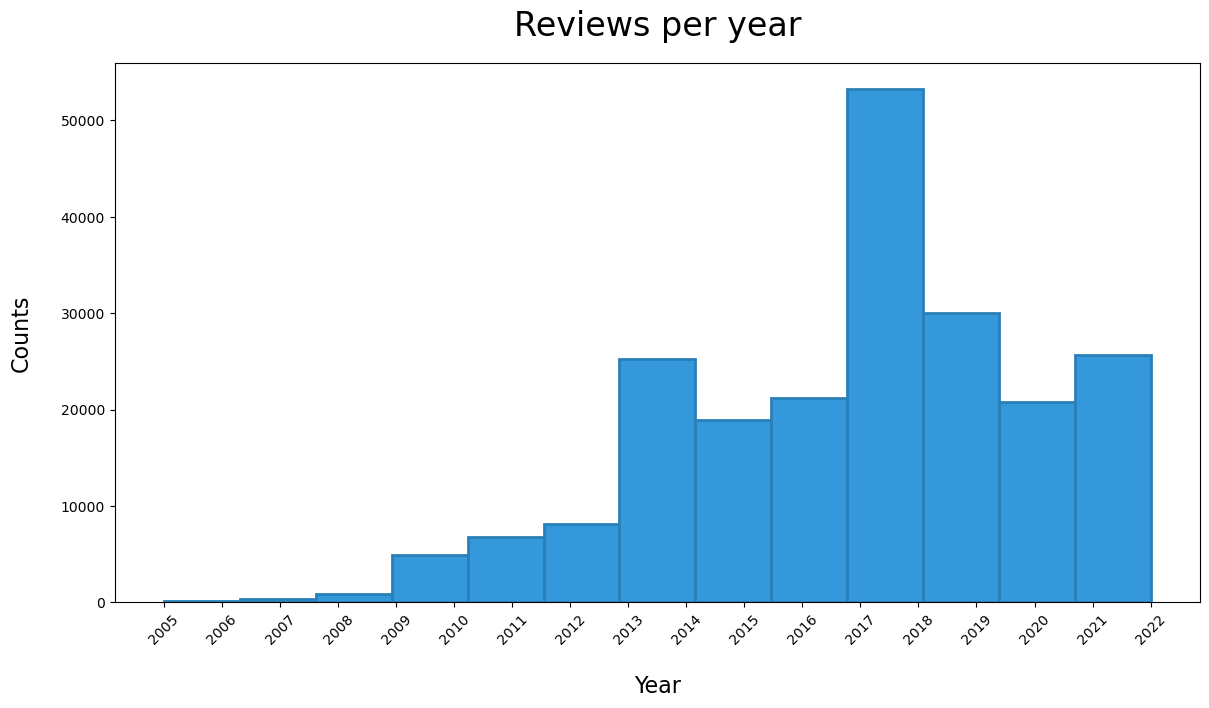

In [27]:
# Histogram plot of Restaurant Reviews per Year

def make_histogram(dataset, attribute, bins=13, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(restaurant_sorted, 'year', title='Reviews per year', xlab='Year', ylab='Counts')

The histogram has a right-skewed distribution with the majority of reviews being in the last 5 years of the dataset (2013-2022). For the purpose of this Capstone Project, I will only be analyzing reviews from the **past 5 years**.

In [28]:
# Filtering for Restaurant/Food Reviews from 2013-2022

restaurant_reviews['year'] = restaurant_reviews['year'].astype(int)
restaurant_reviews = restaurant_reviews[restaurant_reviews['year'] >= 2013]

# Overview of our Final Reviews Dataset, left with 195169 rows of Data

print(restaurant_reviews.shape)
restaurant_reviews.head()

(195169, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
2,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,07,17:56:26
4,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,07,22:36:04
5,WLiqfxv_GhFFA5sm878a2w,CysTz612pTix75Fye6-D4Q,5.0,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34,2013,12,03:15:34
6,3YERGr7UbpSpddqL0Eiu5g,7zJVt_Bl1h5hLjhxl2c1PQ,5.0,1,0,1,This is my favorite restaurant! I always orde...,2017-12-16 00:18:10,2017,12,00:18:10


In [29]:
# Checking for Null Values

restaurant_reviews.isnull().sum()

business_id    0
user_id        0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
dtype: int64

We have **195169** rows of review data for Restaurants and Food outlets in `Tucson`.

### User File

In [31]:
# Importing User JSON File

line_count = len(open("/Users/a_appiagyei/Downloads/yelp_dataset/yelp_academic_dataset_user.json").readlines())

# Creating Columns for Dataframe

users, names, review_counts, since, friends, useful, \
            funny, cool, n_fans, years_elite, average_stars = [], [], [], [], [], [], [], [], [], [], []

# Iterating through each row of the json file

with open("/Users/a_appiagyei/Downloads/yelp_dataset/yelp_academic_dataset_user.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        users += [blob["user_id"]]
        names += [blob["name"]]
        review_counts += [blob["review_count"]]
        since += [blob["yelping_since"]]
        friends += [blob["friends"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        n_fans += [blob["fans"]]
        average_stars += [blob["average_stars"]]

# Creating Dataframe for User json file

users_df = pd.DataFrame(
    {"user_id": users, 
     "user_name": names,
     "user_review_count": review_counts,
     "user_yelp_since": since,
     "friends": friends,
     "useful_reviews": useful,
     "funny_reviews": funny,
     "cool_reviews": cool,
     "n_fans": n_fans,
     "average_stars": average_stars
    }
)

python(25270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████████████████████████| 1987897/1987897 [00:20<00:00, 98744.93it/s]


In [32]:
# Filtering for Active Yelp Users who have completed at least 5 reviews

users_df = users_df[users_df['user_review_count'] >= 5]

# Overview of our JSON Dataframe

print(users_df.shape)
users_df.sample(10)

(1087094, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
720466,zvPfYMEQH3fTEBbPONE5dw,katie,7,2010-10-06 16:24:44,None,14,6,1,0,1.57
1761511,28FyTtsehJBIcL7RTiQ6KQ,Steve,6,2012-07-21 21:51:36,None,1,0,0,0,4.83
608426,nF868nd9iCSaEaYywI1Ilg,Jay,13,2009-08-26 02:52:53,"0khG4VjNvfeWst7XH-Ge0g, YSgWc4Tj4ap9LF0eqlb6OQ...",14,8,3,1,4.31
211515,2zOXdbLjhFkcXSqpyhYBnQ,Darlene,114,2009-06-04 01:23:57,"1IIDeUWkuGNeCaUXwhKo0w, DkkhIpXSijonqKb-EaQjGQ...",293,81,64,10,3.57
171039,hV1E7bOsKvIlJ1TbmtILyg,Marie,39,2009-05-09 21:48:26,None,21,0,3,0,4.10
1592101,LgaelHkhtBm1OPAE_dyjtA,Antony,35,2009-06-13 16:08:18,"z2L8-6A8Tsf0H3KMTHZJUg, 9TAq1yTRxQu5dZkIOGd1-Q...",27,2,8,6,4.08
1070672,D_P7_4ZR3VHc4acHFdtSfQ,Adam,53,2015-06-18 02:33:51,"7WVGR0PIatBM0ap5gwSJHA, dzCJw-JkvPXVNOzicwNGqw...",39,9,5,0,2.73
209380,fAOWpMsOfjV8VIswT2mlfg,Marcus,15,2008-10-31 17:38:28,"aVmrsrbzO3DfxQFITKBi7A, r6iZGSIcFA0gjqOevVRh8A...",20,3,4,1,3.67
1486632,7bu8PisOJwP2i836CjxKvg,Carl,22,2008-06-26 05:30:54,Q2w1iJx4wTqWeTG374V4yw,11,5,13,0,3.61
67760,zJ8Ebca8lYzhlMFQ_Fr4YQ,Larry,6,2013-02-02 22:02:02,"XVPbioXE_TjL6sBxwexudw, btgN-TjlUaxzQNfKOhfRzw...",5,1,0,0,1.83


In [33]:
# Number of unique active users in our user_df dataset

n_users = len(users_df.user_id.unique())
n_users # 1,047,892 unique active users

1087094

In [34]:
# Checking for Null Values

users_df.isnull().sum()

user_id              0
user_name            0
user_review_count    0
user_yelp_since      0
friends              0
useful_reviews       0
funny_reviews        0
cool_reviews         0
n_fans               0
average_stars        0
dtype: int64

### Finalizing Restaurants Business Dataset

In [35]:
# Number of Restaurant Businesses in Arizona

business_food.state.value_counts()

AZ    1805
Name: state, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

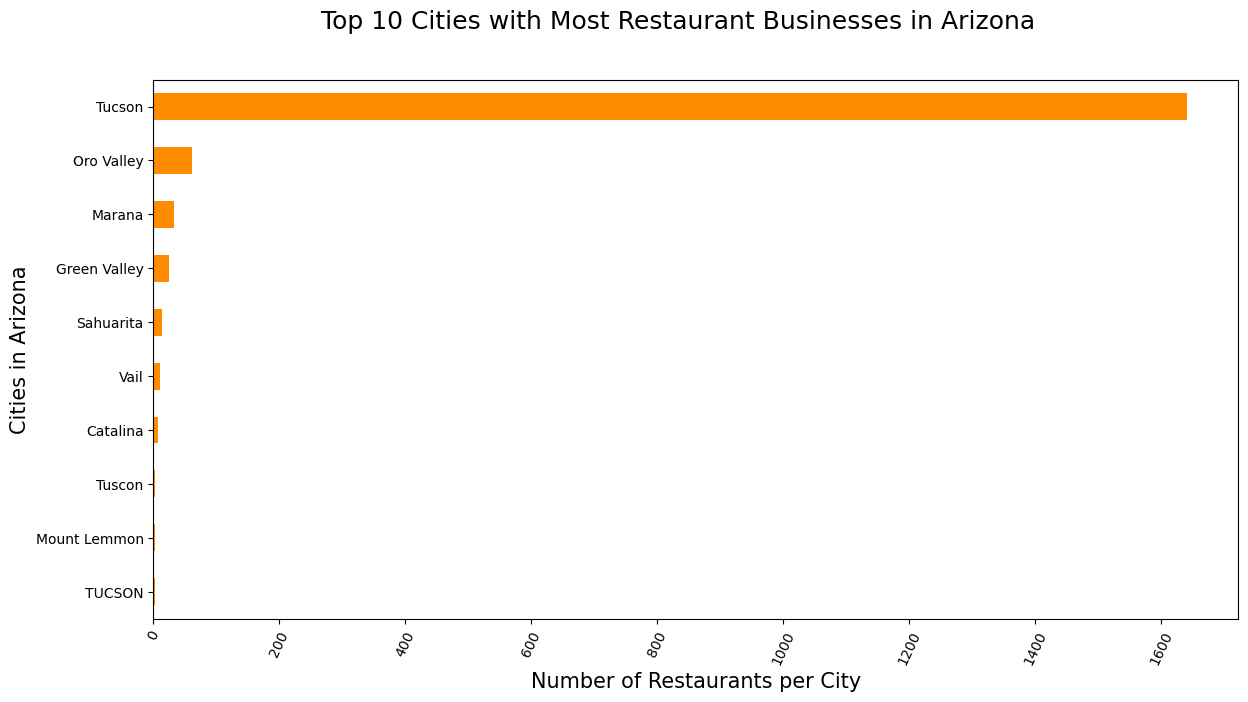

In [36]:
# Distribution of Cities with Most Restaurant Businesses in Arizona

#business_on = business_food[business_food['state']=='ON']
arizona_cities = business_food['city']
top_cities = arizona_cities.value_counts().head(10)
top_cities.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(14, 7), )
fig.suptitle('Top 10 Cities with Most Restaurant Businesses in Arizona', fontsize=18)

top_cities.plot(kind = 'barh', color= 'darkorange')

plt.ylabel('Cities in Arizona', fontsize=15)
plt.xlabel('Number of Restaurants per City', fontsize=15)
plt.xticks(rotation=65)

Based on the above plot, the city of `Tucson` has the majority of the business data. Hence, it will be more concise to focus just on the city of `Tucson` and drop the rest of the cities in `Arizona`.

In [37]:
# Filtering for Restaurant Business Data in the city of Tucson

business_tucson = business_food[business_food['city'] == 'Tucson']
print(business_tucson.shape)
business_tucson.head()

(1641, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
126,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,4.0,22,"Pizza, Restaurants",32.338572,-111.010760,1,85741,anLQj9AM8vjbcLSIE0iUgg
132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,Tucson,AZ,3.5,56,"Bars, Restaurants, Sports Bars, Nightlife",32.206315,-110.887843,1,85711,9C2rpb56aQvW0ViZHK9sPw
234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,Tucson,AZ,4.0,58,"Sports Bars, Bars, Nightlife, Italian, Restaur...",32.338724,-111.030310,1,85741,Y6heWJJ9AmEL58fZwgi9YQ
319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,Tucson,AZ,4.0,446,"Restaurants, Salad, Pakistani, Indian, Cocktai...",32.250960,-110.959158,1,85719,f82dhKNiUXsDVPMLqKYiIQ
457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,Tucson,AZ,4.0,92,"Restaurants, Chinese",32.149473,-110.978186,1,85706,D7z_V6E8cxXghSRcHAmUPg


After filtering, we are now left with **1641** Restaurant Businesses Data in Tucson in our dataset.

In [39]:
# Filtering for Yelp Customer Reviews for our final Restaurant Business Dataset

business_tucson['key'] = business_tucson.iloc[:,0]
reviews_final = restaurant_reviews[restaurant_reviews['business_id'].isin(business_tucson['key'])]
reviews_final = reviews_final.reset_index().iloc[:,1:]
print(reviews_final.shape)
reviews_final.head()

/var/folders/y0/r_kqsy4d1fz_4h1vc5fphx6r0000gn/T/ipykernel_21933/221013238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_tucson['key'] = business_tucson.iloc[:,0]


(181099, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,02,20:30:30
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,07,17:56:26
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,07,22:36:04
3,WLiqfxv_GhFFA5sm878a2w,CysTz612pTix75Fye6-D4Q,5.0,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34,2013,12,03:15:34
4,3YERGr7UbpSpddqL0Eiu5g,7zJVt_Bl1h5hLjhxl2c1PQ,5.0,1,0,1,This is my favorite restaurant! I always orde...,2017-12-16 00:18:10,2017,12,00:18:10


We are now left with **181,099 rows of Yelp User Reviews Data** for our **1641 Restaurant Businesses** in `Tucson`.

In [40]:
# Filtering for our final Yelp Users Dataset

reviews_final['key'] = reviews_final.iloc[:,1]
users_final = users_df[users_df['user_id'].isin(reviews_final['key'])]
users_final = users_final.reset_index().iloc[:,1:]
print(users_final.shape)
users_final.head()

(44178, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
0,x7YtLnBW2dUnrrpwaofVQQ,Ronskee,37,2010-05-06 00:40:56,"EPBLDry-ObheloH-NuvbvQ, 0GHsxjCk-Ynzx4Ihj8tjPQ...",56,29,29,9,3.84
1,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",71,21,19,1,3.62
2,QJI9OSEn6ujRCtrX06vs1w,J,1982,2007-03-19 18:15:32,"RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...",14004,6466,9879,316,3.61
3,KXZ8A8h7Q9ZJRU5TM9asjw,Joanne,102,2010-03-20 17:40:40,"2N4UPgpSHFYJ1OZ0WcvTEQ, JgZ1-9Ii2wCzHE2ylZb6qQ...",150,42,30,7,3.54
4,uVtkixXCP7LXRpC1EedGpA,Paulina,77,2011-03-08 03:00:03,"iPUviZxhOQoKkWjWdz4DUQ, N5dXuVZ2ofc1Oglk2NSVfA...",248,72,84,14,3.91


We are now left with **44,178 unique active Yelp User Data** for our **181,099 rows of Yelp User Reviews Data** for our **1641 Restaurant Businesses** in `Tucson`.

### Saving Dataframes into CSV Files

Having finalized my filtered datasets, I will be saving them into CSVs and will be using these files for subsequent Jupyter Notebooks in this repository.

In [42]:
# Save business_final into csv file

business_tucson.to_csv("/Users/a_appiagyei/Downloads/yelp_dataset/business_final.csv")

In [43]:
# Save reviews_final into csv file

reviews_final.to_csv("/Users/a_appiagyei/Downloads/yelp_dataset/reviews_final.csv")

In [44]:
# Save users_final into csv file

users_final.to_csv("/Users/a_appiagyei/Downloads/yelp_dataset/users_final.csv")